<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#User-defined-functions" data-toc-modified-id="User-defined-functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>User-defined functions</a></span><ul class="toc-item"><li><span><a href="#Looping-over-arrays-in-user-defined-functions" data-toc-modified-id="Looping-over-arrays-in-user-defined-functions-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Looping over arrays in user-defined functions</a></span></li><li><span><a href="#Fast-array-processing-in-user-defined-functions" data-toc-modified-id="Fast-array-processing-in-user-defined-functions-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Fast array processing in user-defined functions</a></span></li><li><span><a href="#Functions-with-more-(or-less)-than-one-input-or-output" data-toc-modified-id="Functions-with-more-(or-less)-than-one-input-or-output-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Functions with more (or less) than one input or output</a></span></li><li><span><a href="#Positional-and-keyword-arguments" data-toc-modified-id="Positional-and-keyword-arguments-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Positional and keyword arguments</a></span></li><li><span><a href="#Variable-number-of-arguments" data-toc-modified-id="Variable-number-of-arguments-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Variable number of arguments</a></span></li><li><span><a href="#Passing-data-to-and-from-functions" data-toc-modified-id="Passing-data-to-and-from-functions-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Passing data to and from functions</a></span></li></ul></li><li><span><a href="#Methods-and-attributes" data-toc-modified-id="Methods-and-attributes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Methods and attributes</a></span></li><li><span><a href="#Example:-linear-least-squares-fitting" data-toc-modified-id="Example:-linear-least-squares-fitting-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Example: linear least squares fitting</a></span><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Linear-regression-with-weighting:-$\chi^2$" data-toc-modified-id="Linear-regression-with-weighting:-$\chi^2$-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Linear regression with weighting: $\chi^2$</a></span></li></ul></li><li><span><a href="#Anonymous-functions-(lambda)" data-toc-modified-id="Anonymous-functions-(lambda)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Anonymous functions (lambda)</a></span></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Exercises</a></span></li></ul></li></ul></div>

python

Functions
=========

As you develop more complex computer code, it becomes increasingly
important to organize your code into modular blocks. One important means
for doing so is *user-defined* Python functions. User-defined functions
are a lot like built-in functions that we have encountered in core
Python as well as in NumPy and Matplotlib. The main difference is that
user-defined functions are written by you. The idea is to define
functions to simplify your code and to allow you to reuse the same code
in different contexts.

The number of ways that functions are used in programming is so varied
that we cannot possibly enumerate all the possibilities. As our use of
Python functions in scientific program is somewhat specialized, we
introduce only a few of the possible uses of Python functions, ones that
are the most common in scientific programming.

single: functions; user defined

User-defined functions
----------------------

The NumPy package contains a plethora of mathematical functions. You can
find a listing of the mathematical functions available through NumPy on
the web page
<http://docs.scipy.org/doc/numpy/reference/routines.math.html>. While
the list may seem pretty exhaustive, you may nevertheless find that you
need a function that is not available in the NumPy Python library. In
those cases, you will want to write your own function.

In studies of optics and signal processing one often runs into the sinc
function, which is defined as

$$\mathrm{sinc}\,x \equiv \frac{\sin x}{x} \;.$$

Let's write a Python function for the sinc function. Here is our first
attempt:

``` python
def sinc(x):
    y = np.sin(x)/x
    return y
```

Every function definition begins with the word `def` followed by the
name you want to give to the function, `sinc` in this case, then a list
of arguments enclosed in parentheses, and finally terminated with a
colon. In this case there is only one argument, `x`, but in general
there can be as many arguments as you want, including no arguments at
all. For the moment, we will consider just the case of a single
argument.

The indented block of code following the first line defines what the
function does. In this case, the first line calculates
$\mathrm{sinc}\,x = \sin x/x$ and sets it equal to `y`. The `return`
statement of the last line tells Python to return the value of `y` to
the user.

We can try it out in the IPython shell. First we type in the function
definition.

``` ipython
In [1]: def sinc(x):
   ...:     y = sin(x)/x
   ...:     return y
```

Because we are doing this from the IPython shell, we don't need to
import NumPy; it's preloaded. Now the function $\mathrm{sinc}\,x$ is
available to be used from the IPython shell

``` ipython
In [2]: sinc(4)
Out[2]: -0.18920062382698205

In [3]: a = sinc(1.2)

In [4]: a
Out[4]: 0.77669923830602194

In [5]: sin(1.2)/1.2
Out[5]: 0.77669923830602194
```

Inputs and outputs 4 and 5 verify that the function does indeed give the
same result as an explicit calculation of $\sin x/x$.

You may have noticed that there is a problem with our definition of
$\mathrm{sinc}\,x$ when `x=0.0`. Let's try it out and see what happens

``` ipython
In [6]: sinc(0.0)
Out[6]: nan
```

IPython returns `nan` or "not a number", which occurs when Python
attempts a division by zero, which is not defined. This is not the
desired response as $\mathrm{sinc}\,x$ is, in fact, perfectly well
defined for $x=0$. You can verify this using L'Hopital's rule, which you
may have learned in your study of calculus, or you can ascertain the
correct answer by calculating the Taylor series for $\mathrm{sinc}\,x$.
Here is what we get

$$\mathrm{sinc}\,x = \frac{\sin x}{x} 
                = \frac{x - \frac{x^3}{3!} + \frac{x^5}{5!} + ...}{x} 
                = 1 - \frac{x^2}{3!} + \frac{x^4}{5!} + ... \;.$$

From the Taylor series, it is clear that $\mathrm{sinc}\,x$ is
well-defined at and near $x=0$ and that, in fact, $\mathrm{sinc}(0)=1$.
Let's modify our function so that it gives the correct value for `x=0`.

``` ipython
In [7]: def sinc(x):
   ...:     if x==0.0:
   ...:         y = 1.0
   ...:     else:
   ...:         y = sin(x)/x
   ...:     return y

In [8]: sinc(0)
Out[8]: 1.0

In [9]: sinc(1.2)
Out[9]: 0.77669923830602194
```

Now our function gives the correct value for `x=0` as well as for values
different from zero.

single: functions; looping over arrays

### Looping over arrays in user-defined functions

The code for $\mathrm{sinc}\,x$ works just fine when the argument is a
single number or a variable that represents a single number. However, if
the argument is a NumPy array, we run into a problem, as illustrated
below.

``` ipython
In [10]: x = arange(0, 5., 0.5)

In [11]: x
Out[11]: array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,
                 4. ,  4.5])

In [12]: sinc(x)
----------------------------------------------------------
ValueError               Traceback (most recent call last)
----> 1 sinc(x)

      1 def sinc(x):
----> 2     if x==0.0:
      3         y = 1.0
      4     else:
      5         y = np.sin(x)/x

ValueError: The truth value of an array with more than one
            element is ambiguous.
```

The `if` statement in Python is set up to evaluate the truth value of a
single variable, not of multielement arrays. When Python is asked to
evaluate the truth value for a multi-element array, it doesn't know what
to do and therefore returns an error.

An obvious way to handle this problem is to write the code so that it
processes the array one element at a time, which you could do using a
`for` loop, as illustrated below.

``` python
def sinc(x):
    y = []              # creates an empty list to store results
    for xx in x:        # loops over all elements in x array
        if xx==0.0:     # adds result of 1.0 to y list if
            y += [1.0]  # xx is zero
        else:           # adds result of sin(xx)/xx to y list if
            y += [np.sin(xx)/xx]  # xx is not zero
    return np.array(y)  # converts y to array and returns array

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 256)
y = sinc(x)

plt.plot(x, y)
plt.axhline(color="gray", zorder=-1)
plt.axvline(color="gray", zorder=-1)
plt.show()
```

The `for` loop evaluates the elements of the `x` array one by one and
appends the results to the list `y` one by one. When it is finished, it
converts the list to an array and returns the array. The code following
the function definition plots $\mathrm{sinc}\,x$ as a function of $x$.

In the program above, you may have noticed that the NumPy library is
imported *after* the `sinc(x)` function definition. As the function uses
the NumPy functions `sin` and `array`, you may wonder how this program
can work. Doesn't the `import numpy` statement have to be called before
any NumPy functions are used? The answer it an emphatic "YES". What you
need to understand is that the function definition is *not executed*
when it is defined, nor can it be as it has no input `x` data to
process. That part of the code is just a definition. The first time the
code for the `sinc(x)` function is actually executed is when it is
called on line 14 of the program, which occurs after the NumPy library
is imported in line 10. The figure below shows the plot of the
$\mathrm{sinc}\,x$ function generated by the above code.

<figure>
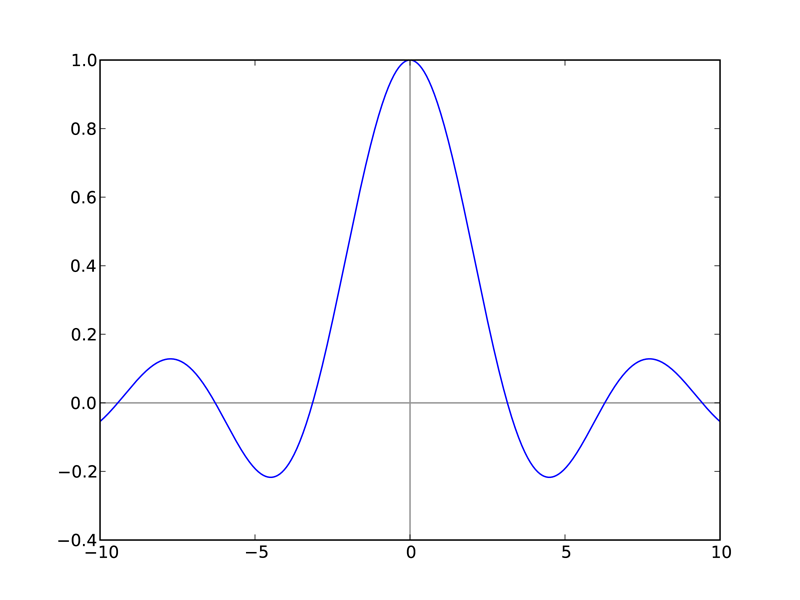<figcaption>Plot of user-defined <code>sinc(x)</code> function.</figcaption>
</figure>

single: functions; fast array processing single: conditionals; applied
to arrays

### Fast array processing in user-defined functions

While using loops to process arrays works just fine, it is usually not
the best way to accomplish the task in Python. The reason is that loops
in Python are executed rather slowly. To deal with this problem, the
developers of NumPy introduced a number of functions designed to process
arrays quickly and efficiently. For the present case, what we need is a
conditional statement or function that can process arrays directly. The
function we want is called `where` and it is a part of the NumPy
library. There `where` function has the form

``` python
where(condition, output if True, output if False)
```

The first argument of the `where` function is a conditional statement
involving an array. The `where` function applies the condition to the
array element by element, and returns the second argument for those
array elements for which the condition is `True`, and returns the third
argument for those array elements that are `False`. We can apply it to
the `sinc(x)` function as follows

``` python
def sinc(x):
    z = np.where(x==0.0, 1.0, np.sin(x)/x)
    return z
```

The `where` function creates the array `y` and sets the elements of `y`
equal to 1.0 where the corresponding elements of `x` are zero, and
otherwise sets the corresponding elements to `sin(x)/x`. This code
executes much faster, 25 to 100 times, depending on the size of the
array, than the code using a `for` loop. Moreover, the new code is much
simpler to write and read. An additional benefit of the `where` function
is that it can handle single variables and arrays equally well. The code
we wrote for the sinc function with the `for` loop cannot handle single
variables. Of course we could rewrite the code so that it did, but the
code becomes even more clunky. It's better just to use NumPy's `where`
function.

#### The moral of the story

The moral of the story is that you should avoid using `for` and `while`
loops to process arrays in Python programs whenever an array-processing
method is available. As a beginning Python programmer, you may not
always see how to avoid loops, and indeed, avoiding them is not always
possible, but you should look for ways to avoid loops, especially loops
that iterate a large number of times. As you become more experienced,
you will find that using array-processing methods in Python becomes more
natural. Using them can greatly speed up the execution of your code,
especially when working with large arrays.

single: functions; multiple inputs and/or outputs

### Functions with more (or less) than one input or output

Python functions can have any number of input arguments and can return
any number of variables. For example, suppose you want a function that
outputs $n$ $(x,y)$ coordinates around a circle of radius $r$ centered
at the point $(x_0,y_0)$. The inputs to the function would be $r$,
$x_0$, $y_0$, and $n$. The outputs would be the $n$ $(x,y)$ coordinates.
The following code implements this function.

``` python
def circle(r, x0, y0, n):
    theta = np.linspace(0., 2.*np.pi, n, endpoint=False)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x0+x, y0+y
```

This function has four inputs and two outputs. In this case, the four
inputs are simple numeric variables and the two outputs are NumPy
arrays. In general, the inputs and outputs can be any combination of
data types: arrays, lists, strings, *etc*. Of course, the body of the
function must be written to be consistent with the prescribed data
types.

Functions can also return nothing to the calling program but just
perform some task. For example, here is a program that clears the
terminal screen

``` python
import subprocess
import platform

def clear():
    subprocess.Popen( "cls" if platform.system() == 
                      "Windows" else "clear", shell=True)
```

The function is invoked by typing `clear()`. It has no inputs and no
outputs but it performs a useful task. This function uses two standard
Python libraries, `subprocess` and `platform` that are useful for
performing computer system tasks. It's not important that you know
anything about them at this point. We simply use them here to
demonstrate a useful cross-platform function that has no inputs and
returns no values.

single: functions; arguments; keyword single: functions; arguments;
positional

### Positional and keyword arguments

It is often useful to have function arguments that have some default
setting. This happens when you want an input to a function to have some
standard value or setting most of the time, but you would like to
reserve the possibility of giving it some value other than the default
value.

For example, in the program `circle` from the previous section, we might
decide that under most circumstances, we want `n=12` points around the
circle, like the points on a clock face, and we want the circle to be
centered at the origin. In this case, we would rewrite the code to read

``` python
def circle(r, x0=0.0, y0=0.0, n=12):
    theta = np.linspace(0., 2.*np.pi, n, endpoint=False)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x0+x, y0+y
```

The default values of the arguments `x0`, `y0`, and `n` are specified in
the argument of the function definition in the `def` line. Arguments
whose default values are specified in this manner are called *keyword
arguments*, and they can be omitted from the function call if the user
is content using those values. For example, writing `circle(4)` is now a
perfectly legal way to call the `circle` function and it would produce
12 $(x,y)$ coordinates centered about the origin $(x,y)=(0,0)$. On the
other hand, if you want the values of `x0`, `y0`, and `n` to be
something different from the default values, you can specify their
values as you would have before.

If you want to change only some of the keyword arguments, you can do so
by using the keywords in the function call. For example, suppose you are
content with have the circle centered on $(x,y)=(0,0)$ but you want only
6 points around the circle rather than 12. Then you would call the
`circle` function as follows:

``` python
circle(2, n=6)
```

The unspecified keyword arguments keep their default values of zero but
the number of points `n` around the circle is now 6 instead of the
default value of 12.

The normal arguments without keywords are called *positional arguments*;
they have to appear *before* any keyword arguments and, when the
function is called, must be supplied values in the same order as
specified in the function definition. The keyword arguments, if
supplied, can be supplied in any order providing they are supplied with
their keywords. If supplied without their keywords, they too must be
supplied in the order they appear in the function definition. The
following function calls to `circle` both give the same output.

``` ipython
In [13]: circle(3, n=3, y0=4, x0=-2)
Out[13]: (array([ 1. , -3.5, -3.5]),
          array([ 4.        ,  6.59807621,  1.40192379]))

In [14]: circle(3, -2, 4, 3)    # w/o keywords, arguments
                                # supplied in order
Out[14]: (array([ 1. , -3.5, -3.5]), array([ 4.        ,
                  6.59807621,  1.40192379]))
```

By now you probably have noticed that we used the keyword argument
`endpoint` in calling `linspace` in our definition of the `circle`
function. The default value of `endpoint` is `True`, meaning that
`linspace` includes the endpoint specified in the second argument of
`linspace`. We set it equal to `False` so that the last point was not
included. Do you see why?

single: functions; arguments; variable number single: functions;
arguments; \*args

### Variable number of arguments

While it may seem odd, it is sometimes useful to leave the number of
arguments unspecified. A simple example is a function that computes the
product of an arbitrary number of numbers:

``` python
def product(*args):
    print("args = {}".format(args))
    p = 1
    for num in args:
        p *= num
    return p
```

``` ipython
In [15]: product(11., -2, 3)
args = (11.0, -2, 3)
Out[15]: -66.0

In [16]: product(2.31, 7)
args = (2.31, 7)
Out[16]: 16.17
```

The `print("args...)` statement in the function definition is not
necessary, of course, but is put in to show that the argument `args` is
a tuple inside the function. Here it used because one does not know
ahead of time how many numbers are to be multiplied together.

The `*args` argument is also quite useful in another context: when
passing the name of a function as an argument in another function. In
many cases, the function name that is passed may have a number of
parameters that must also be passed but aren't known ahead of time. If
this all sounds a bit confusing---functions calling other functions---a
concrete example will help you understand.

Suppose we have the following function that numerically computes the
value of the derivative of an arbitrary function $f(x)$:

``` python
def deriv(f, x, h=1.e-9, *params):
    return (f(x+h, *params)-f(x-h, *params))/(2.*h)
```

The argument `*params` is an optional positional argument. We begin by
demonstrating the use of the function `deriv` without using the optional
`*params` argument. Suppose we want to compute the derivative of the
function $f_0(x)=4x^5$. First, we define the function

``` python
def f0(x):
    return 4.*x**5
```

Now let's find the derivative of $f_0(x)=4x^5$ at $x=3$ using the
function `deriv`:

``` ipython
In [17]: deriv(f0, 3)
Out[17]: 1620.0001482502557
```

The exact result, given by evaluating $f_0^\prime(x)=20x^4$ at $x=3$ is
1620, so our function to numerically calculate the derivative works
pretty well.

Suppose we had defined a more general function $f_1(x)=ax^p$ as follows:

``` python
def f1(x, a, p):
    return a*x**p
```

Suppose we want to calculate the derivative of this function for a
particular set of parameters $a$ and $p$. Now we face a problem, because
it might seem that there is no way to pass the parameters $a$ and $p$ to
the `deriv` function. Moreover, this is a generic problem for functions
such as `deriv` that use a function as an input, because different
functions you want to use as inputs generally come with different
parameters. Therefore, we would like to write our program `deriv` so
that it works, irrespective of how many parameters are needed to specify
a particular function.

This is what the optional positional argument `*params` defined in
`deriv` is for: to pass parameters of `f1`, like $a$ and $b$, through
`deriv`. To see how this works, let's set $a$ and $b$ to be 4 and 5,
respectively, the same values we used in the definition of `f0`, so that
we can compare the results:

``` ipython
In [16]: deriv(f1, 3, 1.e-9, 4, 5)
Out[16]: 1620.0001482502557
```

We get the same answer as before, but this time we have used `deriv`
with a more general form of the function $f_1(x)=ax^p$.

The order of the parameters is important. The function `deriv` uses `x`,
the first argument of `f1`, as its principal argument, and then uses `a`
and `p`, in the same order that they are defined in the function `f1`,
to fill in the additional arguments---the parameters---of the function
`f1`.

single: functions; arguments; \*\*kwargs

Optional arguments must appear after the regular positional and keyword
arguments in a function call. The order of the arguments must adhere to
the following convention:

``` python
def func(pos1, pos2, ..., keywd1, keywd2, ..., *args, **kwargs):
```

That is, the order of arguments is: positional arguments first, then
keyword arguments, then optional positional arguments (`*args`), then
optional keyword arguments (`**kwargs`). Note that to use the `*params`
argument, we had to explicitly include the keyword argument `h` even
though we didn't need to change it from its default value.

Python also allows for a variable number of keyword
arguments---`**kwargs`---in a function call. While `*args` is a tuple,
`kwargs` is a dictionary, so that the value of an optional keyword
argument is accessed through its dictionary key.

### Passing data to and from functions

Functions are like mini-programs within the larger programs that call
them. Each function has a set of variables with certain names that are
to some degree or other isolated from the calling program. We shall get
more specific about just how isolated those variables are below, but
before we do, we introduce the concept of a *namespace*. Each function
has its own namespace, which is essentially a mapping of variable names
to objects, like numerics, strings, lists, and so forth. It's a kind of
dictionary. The calling program has its own namespace, distinct from
that of any functions it calls. The distinctiveness of these namespaces
plays an important role in how functions work, as we shall see below.

#### Variables and arrays created entirely within a function

An important feature of functions is that variables and arrays created
*entirely within* a function cannot be seen by the program that calls
the function unless the variable or array is explicitly passed to the
calling program in the `return` statement. This is important because it
means you can create and manipulate variables and arrays, giving them
any name you please, without affecting any variables or arrays outside
the function, even if the variables and arrays inside and outside a
function share the same name.

To see what how this works, let's rewrite our program to plot the sinc
function using the sinc function definition that uses the `where`
function.

``` python
def sinc(x):
    z = np.where(x==0.0, 1.0, np.sin(x)/x)
    return z

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 256)
y = sinc(x)

plt.plot(x, y)
plt.axhline(color="gray", zorder=-1)
plt.axvline(color="gray", zorder=-1)
plt.show()
```

Running this program produces a plot like the plot of sinc shown in the
previous section. Notice that the array variable `z` is only defined
within the function definition of sinc. If we run the program from the
IPython terminal, it produces the plot, of course. Then if we ask
IPython to print out the arrays, `x`, `y`, and `z`, we get some
interesting and informative results, as shown below.

``` ipython
In [15]: run sinc3.py

In [16]: x
Out[16]: array([-10.        ,  -9.99969482,  -9.99938964, ...,
         9.99938964,   9.99969482,  10.        ])

In [17]: y
Out[17]: array([-0.05440211, -0.05437816, -0.0543542 , ...,
                -0.0543542 , -0.05437816, -0.05440211])

In [18]: z
---------------------------------------------------------
NameError               Traceback (most recent call last)

NameError: name 'z' is not defined
```

When we type in `x` at the `In [16]:` prompt, IPython prints out the
array `x` (some of the output is suppressed because the array `x` has
many elements); similarly for `y`. But when we type `z` at the
`In [18]:` prompt, IPython returns a `NameError` because `z` is not
defined. The IPython terminal is working in the same *namespace* as the
program. But the namespace of the sinc function is isolated from the
namespace of the program that calls it, and therefore isolated from
IPython. This also means that when the sinc function ends with
`return z`, it doesn't return the name `z`, but instead assigns the
values in the array `z` to the array `y`, as directed by the main
program in line 9.

#### Passing variables and arrays to functions: mutable and immutable objects

What happens to a variable or an array passed to a function when the
variable or array is *changed* within the function? It turns out that
the answers are different depending on whether the variable passed is a
simple numeric variable, string, or tuple, or whether it is an array or
list. The program below illustrates the different ways that Python
handles single variables *vs* the way it handles lists and arrays.

``` python
def test(s, v, t, l, a):
    s = "I am doing fine"
    v = np.pi**2
    t = (1.1, 2.9)
    l[-1] = 'end'
    a[0] = 963.2
    return s, v, t, l, a

import numpy as np

s = "How do you do?"
v = 5.0
t = (97.5, 82.9, 66.7)
l = [3.9, 5.7, 7.5, 9.3]
a = np.array(l)

print('*************')
print("s = {0:s}".format(s))
print("v = {0:5.2f}".format(v))
print("t = {0:s}".format(t))
print("l = {0:s}".format(l))
print("a = "),              # comma suppresses line feed
print(a)
print('*************')
print('*call "test"*')

s1, v1, t1, l1, a1 = test(s, v, t, l, a)

print('*************')
print("s1 = {0:s}".format(s1))
print("v1 = {0:5.2f}".format(v1))
print("t1 = {0:s}".format(t1))
print("l1 = {0:s}".format(l1))
print("a1 = "),
print(a1)
print('*************')
print("s = {0:s}".format(s))
print("v = {0:5.2f}".format(v))
print("t = {0:s}".format(t))
print("l = {0:s}".format(l))
print("a = "),              # comma suppresses line feed
print(a)
print('*************')
```

The function `test` has five arguments, a string `s`, a numerical
variable `v`, a tuple `t`, a list `l`, and a NumPy array `a`. `test`
modifies each of these arguments and then returns the modified `s`, `v`,
`t`, `l`, `a`. Running the program produces the following output.

``` ipython
In [17]: run passingVars.py
*************
s = How do you do?
v =  5.00
t = (97.5, 82.9, 66.7)
l = [3.9, 5.7, 7.5, 9.3]
a =  [ 3.9  5.7  7.5  9.3]
*************
*call "test"*
*************
s1 = I am doing fine
v1 =  9.87
t1 = (1.1, 2.9)
l1 = [3.9, 5.7, 7.5, 'end']
a1 =  [ 963.2    5.7    7.5    9.3]
*************
s = How do you do?
v =  5.00
t = (97.5, 82.9, 66.7)
l = [3.9, 5.7, 7.5, 'end']
a =  [ 963.2    5.7    7.5    9.3]
*************
```

The program prints out three blocks of variables separated by asterisks.
The first block merely verifies that the contents of `s`, `v`, `t`, `l`,
and `a` are those assigned in lines 10-13. Then the function `test` is
called. The next block prints the output of the call to the function
`test`, namely the variables `s1`, `v1`, `t1`, `l1`, and `a1`. The
results verify that the function modified the inputs as directed by the
`test` function.

The third block prints out the variables `s`, `v`, `t`, `l`, and `a`
from the calling program *after* the function `test` was called. These
variables served as the inputs to the function `test`. Examining the
output from the third printing block, we see that the values of the
string `s`, the numeric variable `v`, and the contents of `t` are
unchanged after the function call. This is probably what you would
expect. On the other hand, we see that the list `l` and the array `a`
are changed after the function call. This might surprise you! But these
are important points to remember, so important that we summarize them in
two bullet points here:

> -   Changes to string, variable, and tuple arguments of a function
>     within the function do not affect their values in the calling
>     program.
> -   Changes to values of elements in list and array arguments of a
>     function within the function are reflected in the values of the
>     same list and array elements in the calling function.

The point is that simple numerics, strings and tuples are immutable
while lists and arrays are mutable. Because immutable objects can't be
changed, changing them within a function creates new objects with the
same name inside of the function, but the old immutable objects that
were used as arguments in the function call remain unchanged in the
calling program. On the other hand, if elements of mutable objects like
those in lists or arrays are changed, then those elements that are
changed inside the function are also changed in the calling program.

Methods and attributes
----------------------

You have already encountered quite a number of functions that are part
of either NumPy or Python or Matplotlib. But there is another way in
which Python implements things that act like functions. To understand
what they are, you need to understand that variables, strings, arrays,
lists, and other such data structures in Python are not merely the
numbers or strings we have defined them to be. They are *objects*. In
general, an object in Python has associated with it a number of
*attributes* and a number of specialized functions called *methods* that
act on the object. How attributes and methods work with objects is best
illustrated by example.

Let's start with the NumPy array. A NumPy array is a Python object and
therefore has associated with it a number of attributes and methods.
Suppose, for example, we write `a = random.random(10)`, which creates an
array of 10 uniformly distributed random numbers between 0 and 1. An
example of an attribute of an array is the size or number of elements in
the array. An attribute of an object in Python is accessed by typing the
object name followed by a period followed by the attribute name. The
code below illustrates how to access two different attributes of an
array, it's size and its data type.

``` ipython
In [18]: a = random.random(10)

In [19]: a.size
Out[19]: 10

In [20]: a.dtype
Out[20]: dtype('float64')
```

Any object in Python can and in general does have a number of attributes
that are accessed in just the way demonstrated above, with a period and
the attribute name following the name of the particular object. In
general, attributes involve properties of the object that are stored by
Python with the object and require no computation. Python just looks up
the attribute and returns its value.

Objects in Python also have associated with them a number of specialized
functions called *methods* that act on the object. In contrast to
attributes, methods generally involve Python performing some kind of
computation. Methods are accessed in a fashion similar to attributes, by
appending a period followed the method's name, which is followed by a
pair of open-close parentheses, consistent with methods being a kind of
function that acts on the object. Often methods are used with no
arguments, as methods by default act on the object whose name they
follow. In some cases. however, methods can take arguments. Examples of
methods for NumPy arrays are sorting, calculating the mean, or standard
deviation of the array. The code below illustrates a few array methods.

``` ipython
In [21]: a
Out[21]: 
array([ 0.859057  ,  0.27228037,  0.87780026,  0.14341207,
        0.05067356,  0.83490135,  0.54844515,  0.33583966,
        0.31527767,  0.15868803])

In [22]: a.sum()                # sum
Out[22]: 4.3963751104791005

In [23]: a.mean()               # mean or average
Out[23]: 0.43963751104791005

In [24]: a.var()                # variance
Out[24]: 0.090819477333711512

In [25]: a.std()                # standard deviation
Out[25]: 0.30136270063448711

In [26]: a.sort()               # sort small to large

In [27]: a
Out[27]: 
array([ 0.05067356,  0.14341207,  0.15868803,  0.27228037,
        0.31527767,  0.33583966,  0.54844515,  0.83490135,
        0.859057  ,  0.87780026])

In [28]: a.clip(0.3, 0.8)
Out[29]: 
array([ 0.3       ,  0.3       ,  0.3       ,  0.3       ,
        0.31527767,  0.33583966,  0.54844515,  0.8       ,
        0.8       ,  0.8       ])
```

The `clip()` method provides an example of a method that takes an
argument, in this case the arguments are the lower and upper values to
which array elements are cutoff if their values are outside the range
set by these values.

single: curve fitting; linear

Example: linear least squares fitting
-------------------------------------

In this section we illustrate how to use functions and methods in the
context of modeling experimental data.

In science and engineering we often have some theoretical curve or
*fitting function* that we would like to fit to some experimental data.
In general, the fitting function is of the form $f(x; a, b, c, ...)$,
where $x$ is the independent variable and $a$, $b$, $c$, ... are
parameters to be adjusted so that the function $f(x; a, b, c, ...)$ best
fits the experimental data. For example, suppose we had some data of the
velocity *vs* time for a falling mass. If the mass falls only a short
distance such that its velocity remains well below its terminal
velocity, we can ignore air resistance. In this case, we expect the
acceleration to be constant and the velocity to change linearly in time
according to the equation

$$v(t) = v_{0} - g t \;,$$

where $g$ is the local gravitational acceleration. We can fit the data
graphically, say by plotting it as shown below in Fig.
`4.6<fig:FallingMassDataPlot>` and then drawing a line through the data.
When we draw a straight line through a data, we try to minimize the
distance between the points and the line, globally averaged over the
whole data set.

<figure>
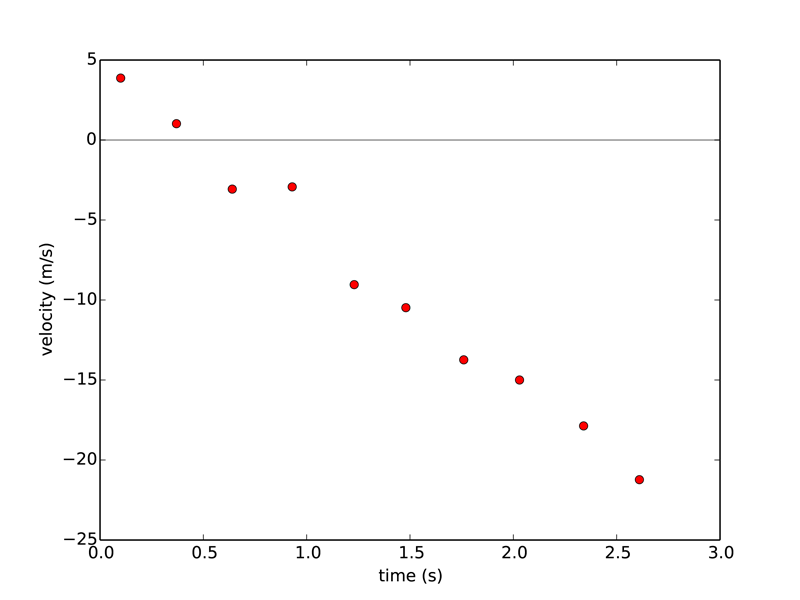<figcaption>Velocity <em>vs</em> time for falling mass.</figcaption>
</figure>

While this can give a reasonable estimate of the best fit to the data,
the procedure is rather *ad hoc*. We would prefer to have a more
well-defined analytical method for determining what constitutes a "best
fit". One way to do that is to consider the sum

$$S = \sum_{i}^{n} [y_{i} - f(x_{i}; a, b, c, ...)]^2 \;,$$

where $y_{i}$ and $f(x_{i}; a, b, c, ...)$ are the values of the
experimental data and the fitting function, respectively, at $x_{i}$,
and $S$ is the square of their difference summed over all $n$ data
points. The quantity $S$ is a sort of global measure of how much the the
fit $f(x_{i}; a, b, c, ...)$ differs from the experimental data $y_{i}$.

Notice that for a given set of data points $\{x_i, y_i\}$, $S$ is a
function only of the fitting parameters $a, b, ...$, that is,
$S=S(a, b, c, ...)$. One way of defining a *best* fit, then, is to find
the values of the fitting parameters $a, b, ...$ that minimize the $S$.

In principle, finding the values of the fitting parameters $a, b, ...$
that minimize the $S$ is a simple matter. Just set the partial
derivatives of $S$ with respect to the fitting parameter equal to zero
and solve the resulting system of equations:

$$\frac{\partial S}{\partial a} = 0 \;, \quad
\frac{\partial S}{\partial b} = 0 \;, ...$$

Because there are as many equations as there are fitting paramters, we
should be able to solve the system of equations and find the values of
the fitting parameters that minimize $S$. Solving those systems of
equations is straightforward if the fitting function $f(x; a, b, ...)$
is linear in the fitting parameters. Some examples of fitting functions
linear in the fitting parameters are:

$$\begin{aligned}
f(x; a, b) &= a + bx \\
f(x; a, b, c) &= a + bx + cx^2 \\
f(x; a, b, c) &= a \sin x + b e^x + c e^{-x^2} \;.
\end{aligned}$$

For fitting functions such as these, taking the partial derivatives with
respect to the fitting parameters, as proposed in `eq:sysSzero`, results
in a set of algebraic equations that are linear in the fitting paramters
$a, b, ...$ Because they are linear, these equations can be solved in a
straightforward manner.

For cases in which the fitting function is not linear in the fitting
parameters, one can generally still find the values of the fitting
parameters that minimize $S$ but finding them requires more work, which
goes beyond our immediate interests here.

### Linear regression

We start by considering the simplest case, fitting a straight line to a
data set, such as the one shown in Fig. `4.6 <fig:FallingMassDataPlot>`
above. Here the fitting function is $f(x) = a + bx$, which is linear in
the fitting parameters $a$ and $b$. For a straight line, the sum in
`eq:lsqrsum` becomes

$$S(a,b) = \sum_{i} (y_{i} - a - bx_{i})^2 \;.$$

Finding the best fit in this case corresponds to finding the values of
the fitting parameters $a$ and $b$ for which $S(a,b)$ is a minimum. To
find the minimum, we set the derivatives of $S(a,b)$ equal to zero:

$$\begin{aligned}
\frac{\partial S}{\partial a} &= \sum_{i}-2(y_{i}-a-bx_{i}) = 2 \left(na + b\sum_{i}x_{i} - \sum_{i}y_{i} \right) = 0 \\
\frac{\partial S}{\partial b} &= \sum_{i}-2(y_{i}-a-bx_{i})\,x_{i} = 2 \left(a\sum_{i}x_{i} + b\sum_{i}x_{i}^2 - \sum_{i}x_{i}y_{i} \right) = 0
\end{aligned}$$

Dividing both equations by $2n$ leads to the equations

$$\begin{aligned}
a + b\bar{x} &= \bar{y}\\
a\bar{x} + b\frac{1}{n}\sum_{i}x_{i}^2  &=  \frac{1}{n}\sum_{i}x_{i}y_{i}
\end{aligned}$$

where

$$\begin{aligned}
\bar{x} &= \frac{1}{n}\sum_{i}x_{i}\\
\bar{y} &= \frac{1}{n}\sum_{i}y_{i}\;.
\end{aligned}$$

Solving Eq. `eq:ablinreg` for the fitting parameters gives

$$\begin{aligned}
b &= \frac{\sum_{i}x_{i}y_{i} - n\bar{x}\bar{y}} {\sum_{i}x_{i}^2 - n \bar{x}^2}\\
a &= \bar{y} - b\bar{x} \;.
\end{aligned}$$

Noting that $n\bar{y}=\sum_{i}y$ and $n\bar{x}=\sum_{i}x$, the results
can be written as

$$\begin{aligned}
b &= \frac{\sum_{i}(x_{i}- \bar{x})\,y_{i}} {\sum_{i}(x_{i}- \bar{x})\,x_{i}} \\
a &= \bar{y} - b\bar{x} \;.
\end{aligned}$$

While Eqs. `eq:b1` and `eq:b2` are equivalent analytically, Eq. `eq:b2`
is preferred for numerical calculations because Eq. `eq:b2` is less
sensitive to roundoff errors. Here is a Python function implementing
this algorithm:

    def LineFit(x, y):
        ''' Returns slope and y-intercept of linear fit to (x,y)
        data set'''
        xavg = x.mean()
        slope = (y*(x-xavg)).sum()/(x*(x-xavg)).sum()
        yint = y.mean()-slope*xavg
        return slope, yint

It's hard to imagine a simpler implementation of the linear regression
algorithm.

single: curve fitting; linear; with weighting

### Linear regression with weighting: $\chi^2$

The linear regression routine of the previous section weights all data
points equally. That is fine if the absolute uncertainty is the same for
all data points. In many cases, however, the uncertainty is different
for different points in a data set. In such cases, we would like to
weight the data that has smaller uncertainty more heavily than those
data that have greater uncertainty. For this case, there is a standard
method of weighting and fitting data that is known as $\chi^2$ (or
*chi-squared*) fitting. In this method we suppose that associated with
each $(x_{i},y_{i})$ data point is an uncertainty in the value of
$y_{i}$ of $\pm\sigma_{i}$. In this case, the "best fit" is defined as
the the one with the set of fitting parameters that minimizes the sum

$$\chi^2 = \sum_{i} \left(\frac{y_{i} - f(x_{i})} {\sigma_{i}}\right)^2 \;.$$

Setting the uncertainties $\sigma_{i}=1$ for all data points yields the
same sum $S$ we introduced in the previous section. In this case, all
data points are weighted equally. However, if $\sigma_{i}$ varies from
point to point, it is clear that those points with large $\sigma_{i}$
contribute less to the sum than those with small $\sigma_{i}$. Thus,
data points with large $\sigma_{i}$ are weighted less than those with
small $\sigma_{i}$.

To fit data to a straight line, we set $f(x) = a + bx$ and write

$$\chi^2(a,b) = \sum_{i} \left(\frac{y_{i} - a -bx_{i}} {\sigma_{i}}\right)^2 \;.$$

Finding the minimum for $\chi^2(a,b)$ follows the same procedure used
for finding the minimum of $S(a,b)$ in the previous section. The result
is

$$\begin{aligned}
b &= \frac{\sum_{i}(x_{i} - \hat{x})\,y_{i}/\sigma_{i}^2} {\sum_{i}(x_{i} - \hat{x})\,x_{i}/\sigma_{i}^2}\\
a &= \hat{y} - b\hat{x} \;.
\end{aligned}$$

where

$$\begin{aligned}
\hat{x} &= \frac{\sum_{i}x_{i}/\sigma_{i}^2} {\sum_{i}1/\sigma_{i}^2}\\
\hat{y} &= \frac{\sum_{i}y_{i}/\sigma_{i}^2} {\sum_{i}1/\sigma_{i}^2}\;.
\end{aligned}$$

For a fit to a straight line, the overall quality of the fit can be
measured by the reduced chi-squared parameter

$$\chi_{r}^2 = \frac{\chi^2}{n-2}$$

where $\chi^2$ is given by Eq. `eq:chisq` evaluated at the optimal
values of $a$ and $b$ given by Eq. `eq:abwchisq`. A good fit is
characterized by $\chi_{r}^2 \approx 1$. This makes sense because if the
uncertainties $\sigma_{i}$ have been properly estimated, then
$[y_{i}-f(x_{i})]^2$ should on average be roughly equal to
$\sigma_{i}^2$, so that the sum in Eq. `eq:chisq` should consist of $n$
terms approximately equal to 1. Of course, if there were only 2 terms
(<span class="title-ref">n=2</span>), then $\chi^2$ would be zero as the
best straight line fit to two points is a perfect fit. That is
essentially why $\chi_{r}^2$ is normalized using $n-2$ instead of $n$.
If $\chi_{r}^2$ is significantly greater than 1, this indicates a poor
fit to the fitting function (or an underestimation of the uncertainties
$\sigma_{i}$). If $\chi_{r}^2$ is significantly less than 1, then it
indicates that the uncertainties were probably overestimated (the fit
and fitting function may or may not be good).

<figure>
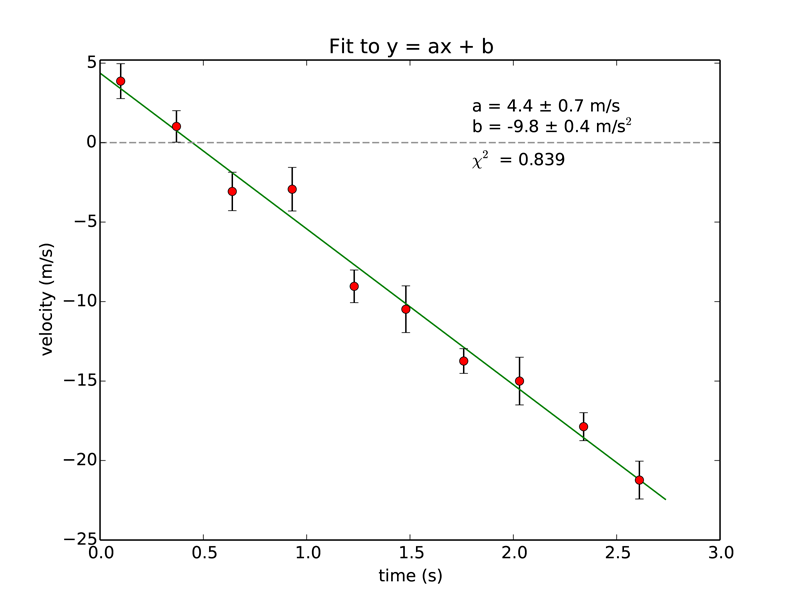<figcaption>Fit using <span class="math inline"><em>χ</em><sup>2</sup></span> least squares fitting routine with data weighted by error bars.</figcaption>
</figure>

We can also get estimates of the uncertainties in our determination of
the fitting parameters $a$ and $b$, although deriving the formulas is a
bit more involved that we want to get into here. Therefore, we just give
the results:

$$\begin{aligned}
\sigma_{b}^2 &= \frac{1} {\sum_{i}(x_{i} - \hat{x})\,x_{i}/\sigma_{i}^2}\\
\sigma_{a}^2 &= \sigma_{b}^2 \frac{\sum_{i}x_{i}^2/\sigma_{i}^2} {\sum_{i}1/\sigma_{i}^2}\;.
\end{aligned}$$

The estimates of uncertainties in the fitting parameters depend
explicitly on $\{\sigma_{i}\}$ and will only be meaningful if (*i*)
$\chi_{r}^2 \approx 1$ and (*ii*) the estimates of the uncertainties
$\sigma_{i}$ are accurate.

You can find more information, including a derivation of Eq.
`eq:absigma`, in *Data Reduction and Error Analysis for the Physical
Sciences, 3rd ed* by P. R. Bevington & D. K. Robinson, McGraw-Hill, New
York, 2003.

single: anonymous functions single: anonymous functions; lambda
expressions single: lambda expressions

Anonymous functions (lambda)
----------------------------

Python provides another way to generate functions called *lambda*
expressions. A lambda expression is a kind of in-line function that can
be generated on the fly to accomplish some small task. You can assign
lambda functions a name, but you don't need to; hence, they are often
called *anonymous* functions. A lambda uses the keyword `lambda` and has
the general form

``` ipython
lambda arg1, arg2, ... : output
```

The arguments `arg1, arg2, ...` are inputs to a lambda, just as for a
functions, and the output is an expression using the arguments.

While lambda expressions need not be named, we illustrate their use by
comparing a conventional Python function definition to a lambda
expression to which we give a name. First, we define a conventional
python function

``` ipython
In [1]: def f(a, b):
   ...:     return 3*a+b**2

In [2]: f(2,3)
Out[2]: 15
```

Next, we define a lambda that does the same thing

``` ipython
In [3]: g = lambda a, b : 3*a+b**2

In [4]: g(2,3)
Out[4]: 15
```

The `lambda` defined by `g` does the same thing as the function `f`.
Such `lambda` expressions are useful when you need a very short function
definition, usually to be used locally only once or a few times.

Sometimes lambda expressions are used in function arguments that call
for a function *name*, as opposed to the function itself. Moreover, in
cases where a the function to be integrated is already defined but is a
function one independent variable and several parameters, the lambda
expression can be a convenient way of fashioning a single variable
function. Don't worry if this doesn't quite make sense to you right now.
You will see examples of lambda expressions used in just this way in the
section `numericalIntegration`.

There are also a number of nifty programming tricks that can be
implemented using `lambda` expressions, but we will not go into them
here. Look up `lambdas` on the web if you are curious about their more
exotic uses.

Exercises
---------

1.  Write a function that can return each of the first three spherical
    Bessel functions $j_n(x)$:

    $$\begin{aligned}
    j_0(x) &= \frac{\sin x}{x}\\
    j_1(x) &= \frac{\sin x}{x^2} - \frac{\cos x}{x}\\
    j_2(x) &= \left(\frac{3}{x^2}-1\right)\frac{\sin x}{x} - \frac{3\cos x}{x^2}
    \end{aligned}$$

    Your function should take as arguments a NumPy array $x$ and the
    order $n$, and should return an array of the designated order $n$
    spherical Bessel function. Take care to make sure that your
    functions behave properly at $x=0$.

    Demonstrate the use of your function by writing a Python routine
    that plots the three Bessel functions for $0 \le x \le 20$. Your
    plot should look like the one below. Something to think about: You
    might note that $j_1(x)$ can be written in terms of $j_0(x)$, and
    that $j_2(x)$ can be written in terms of $j_1(x)$ and $j_0(x)$. Can
    you take advantage of this to write a more efficient function for
    the calculations of $j_1(x)$ and $j_2(x)$?

    <figure>
    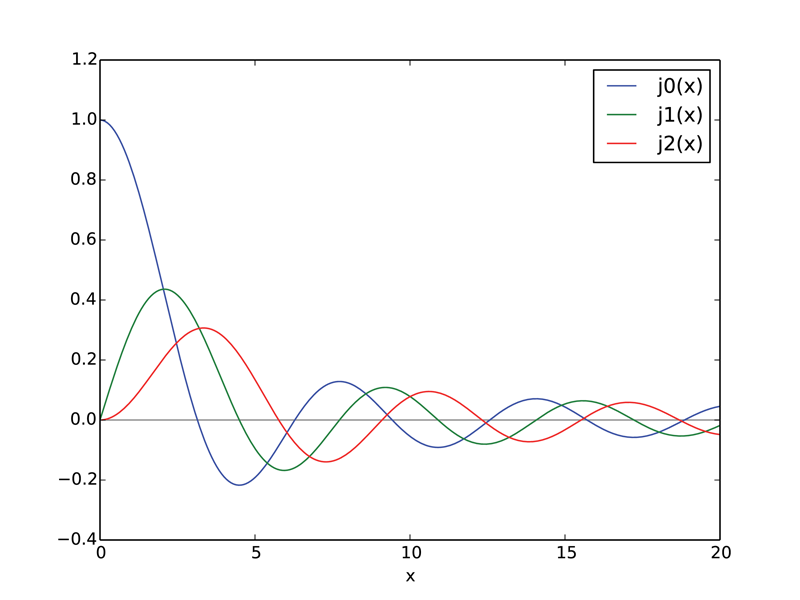
    </figure>

2.  1.  Write a function that simulates the rolling of $n$ dice. Use the
        NumPy function `random.random_integers(6)`, which generates a
        random integer between 1 and 6 with equal probability (like
        rolling fair dice). The input of your function should be the
        number of dice thrown each roll and the output should be the sum
        of the $n$ dice.
    2.  "Roll" 2 dice 10,000 times keeping track of all the sums of each
        set of rolls in a list. Then use your program to generate a
        histogram summarizing the rolls of two dice 10,000 times. The
        result should look like the histogram plotted below. Use the
        MatPlotLib function `hist` (see
        <http://matplotlib.org/api/pyplot_summary.html>) and set the
        number of bins in the histogram equal to the number of different
        possible outcomes of a roll of your dice. For example, the sum
        of two dice can be anything between 2 and 12, which corresponds
        to 11 possible outcomes. You should get a histogram that looks
        like the one below.
    3.  "Repeat part (b) using 3 dice and plot the resulting histogram.

    <figure>
    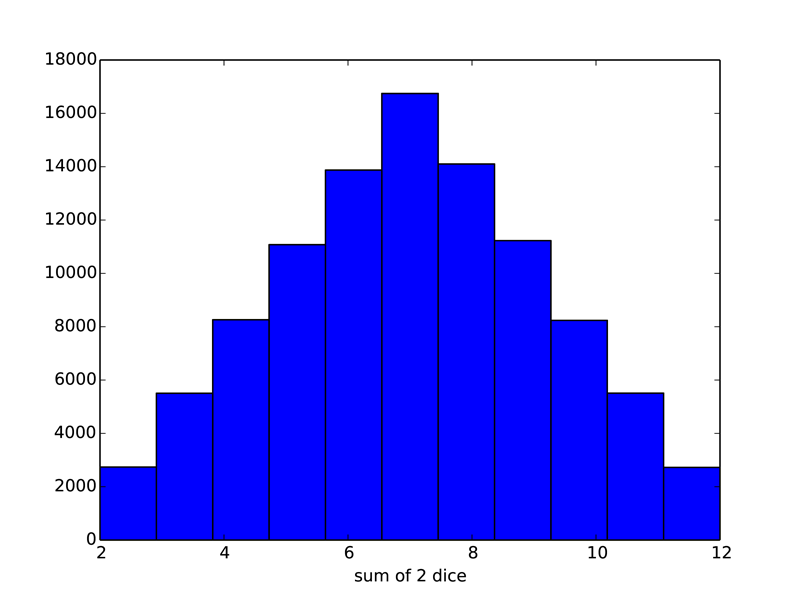
    </figure>

3.  Write a function to draw a circular smiley face with eyes, a nose,
    and a mouth. One argument should set the overall size of the face
    (the circle radius). Optional arguments should allow the user to
    specify the $(x,y)$ position of the face, whether the face is
    smiling or frowning, and the color of the lines. The default should
    be a smiling blue face centered at $(0,0)$. Once you write your
    function, write a program that calls it several times to produce a
    plot like the one below (creative improvisation is encouraged!). In
    producing your plot, you may find the call
    `plt.axes().set_aspect(1)` useful so that circles appear as circles
    and not ovals. You should only use MatPlotLib functions introduced
    in this text. To create a circle you can create an array of angles
    that goes from 0 to $2\pi$ and then produce the $x$ and $y$ arrays
    for your circle by taking the cosine and sine, respectively, of the
    array. Hint: You can use the same $(x,y)$ arrays to make the smile
    and frown as you used to make the circle by plotting appropriate
    slices of those arrays. You do not need to create new arrays.

    <figure>
    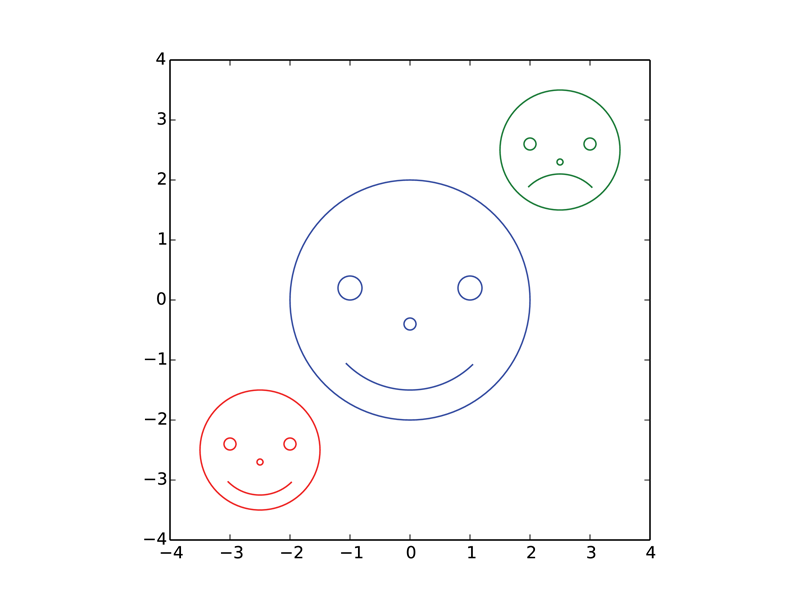
    </figure>

4.  In the section `linfitfunc`, we showed that the best fit of a line
    $y = a + bx$ to a set of data $\{(x_i,y_i)\}$ is obtained for the
    values of $a$ and $b$ given by Eq. `eq:b2`. Those formulas were
    obtained by finding the values of $a$ and $b$ that minimized the sum
    in Eq. `eq:linreg1`. This approach and these formulas are valid when
    the uncertainties in the data are the same for all data points. The
    Python function `LineFit(x, y)` in the section `linfitfunc`
    implements Eq. `eq:b2`.

    1.  Write a new fitting function `LineFitWt(x, y)` that implements
        the formulas given in Eq. `eq:xychisq` that minimize the
        $\chi^2$ function give by Eq. `eq:chisqlin`. This more general
        approach is valid when the individual data points have different
        weightings *or* when they all have the same weighting. You
        should also write a function to calculate the reduced
        chi-squared $\chi_r^2$ defined by Eq. `eq:chisqlin`.

    2.  Write a Python program that reads in the data below, plots it,
        and fits it using the two fitting functions `LineFit(x, y)` and
        `LineFitWt(x, y)`. Your program should plot the data with error
        bars and with *both* fits with and without weighting, that is
        from `LineFit(x, y)` and `LineFitWt(x, y, dy)`. It should also
        report the results for both fits on the plot, similar to the
        output of the supplied program above, as well as the values of
        $\chi_r^2$, the reduce chi-squared value, for both fits. Explain
        why weighting the data gives a steeper or less steep slope than
        the fit without weighting.

            Velocity vs time data
            for a falling mass
            time (s)   velocity (m/s)   uncertainty (m/s)
              2.23          139               16
              4.78          123               16
              7.21          115                4
              9.37           96                9
             11.64           62               17
             14.23           54               17
             16.55           10               12
             18.70           -3               15
             21.05          -13               18
             23.21          -55               10

5.  Modify the function `LineFitWt(x, y)` you wrote in Exercise 4 above
    so that in addition to returning the fitting parameters $a$ and $b$,
    it also returns the uncertainties in the fitting parameters
    $\sigma_a$ and $\sigma_b$ using the formulas given by Eq.
    `eq:absigma`. Use your new fitting function to find the
    uncertainties in the fitted slope and $y$-intercept for the data
    provided with Exercise 4.